In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow


import pymc3 as pm


from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_california_housing

#from tensorflow.keras.datasets import california_housing

### 2.3 Bayesian linear regression with PyMC3
In this task you are required to use PyMC3 to perform Bayesian linear regression on the California housing dataset which is easily available via the sklearn.datasets.fetch california housing function. The goal with this dataset is to predict the median house value in a ‘block’ in California. A block is a small geographical area with a population of between 600 and 3000 people. Each datapoint in this dataset corresponds to a block. Consult the scikit-learn documentation for details of the predictor variables.
1. Produce a suitable plot which shows how longitude and latitude affects median house price. Explain what your plot tells you about the relationship between these two predictors and median house price. (5 marks)
2. Decide whether you need to transform and/or clean the data. Justifyyour decision in your report. (5 marks)
3. Choose prior distributions for all model parameters and then use PyMC3to get approximate posterior distributions over each model parameter. In your report include plots of these posterior distributions, as well as giving the mean and standard deviation of each distribution. (5 marks)
4. Did your run of PyMC3 succeed, that is: did it produce good approximations to the desired posterior distributions? Explain your answer.(5 marks)
5. The full dataset has 20640 datapoints. Now run PyMC3 on two random samples of datapoints, one of size 50 and one of size 500. Compare the posterior distributions you get for the 3 dataset sizes (50, 500 and 20640), stating what the most important differences are and explaining how these differences arose. (5 marks)

Without knowledge of the true model parameters, the goal of Bayesian linear regression is to obtain a distribution (posterior) over the model parameters from the data, $P(w_0,w_1,\sigma \vert \mathcal{D})$. First we need to define a prior over the three parameters:

1. $p(w_0) = \mathcal{N}(0, 20)$
2. $p(w_1) = \mathcal{N}(0, 20)$
3. $p(\sigma) = U(0, 20)$

Below is the code to define this model in pymc3. Note that this code performs MCMC using a No U-Turn Sampler (NUTS) which operates using the same principles as the Metropolis algorithm but is much more efficient.

In [16]:
california_housing = fetch_california_housing(as_frame=True)
X = np.array(california_housing.data)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(california_housing.data), np.array(california_housing.target),test_size=0.1, random_state=40)
print(X_train.shape); print(X_test.shape)
print(y_train.shape); print(y_test.shape)
print(california_housing.feature_names)

(18576, 8)
(2064, 8)
(18576,)
(2064,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Produce a suitable plot which shows how longitude and latitude affects median house price. 

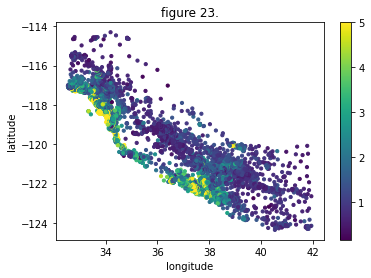

In [3]:
plt.scatter(california_housing.frame["Latitude"], california_housing.frame["Longitude"], c=california_housing.target, s=10, cmap='viridis')
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.colorbar()
plt.title('figure 23.')
plt.show()

Decide whether you need to transform and/or clean the data.

In [ ]:
#I haven't used it yet
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
print(X_train.shape); print(y_train.shape)
print(california_housing.frame.info())
print(california_housing.frame.describe())

(18576, 8)
(18576,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154  

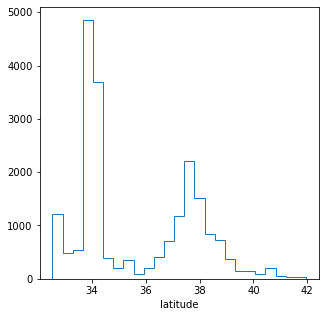

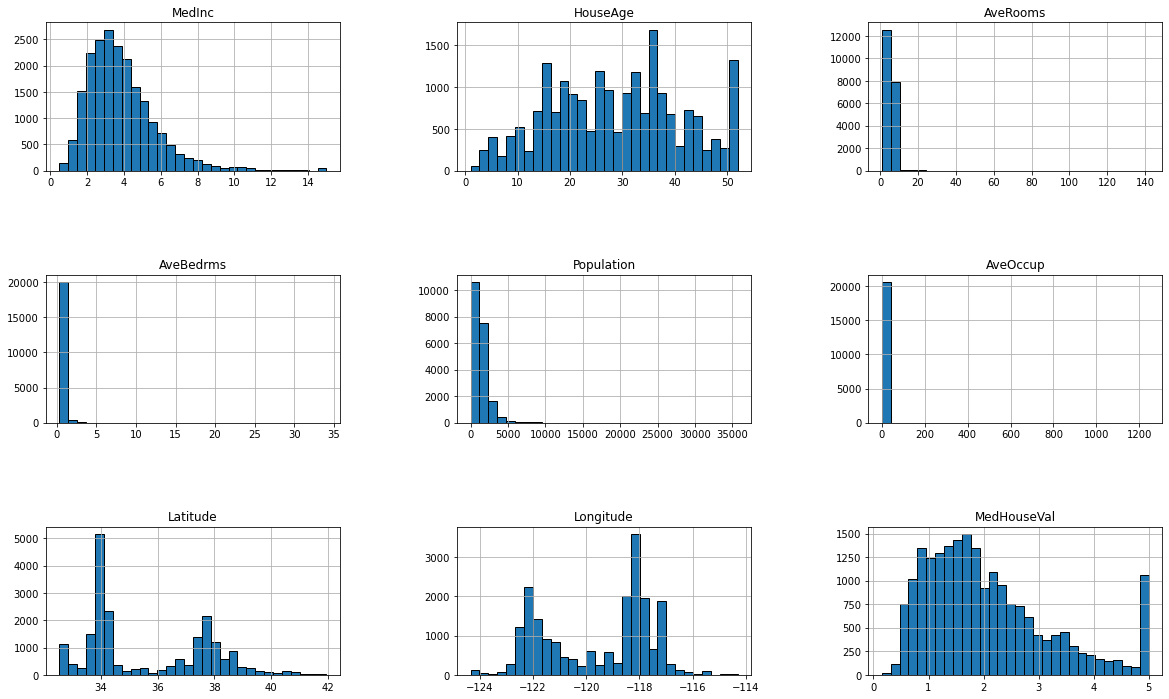

In [18]:
california_housing.frame.hist(figsize=(20, 12), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [5]:
#correlations
#you can drop the ones with the lowest
from scipy.stats import pearsonr
corr_income, _ = pearsonr(california_housing.frame["MedInc"], california_housing.target)
print('Pearsons correlation- income: %.3f' % corr_income)
corr_age, _ = pearsonr(california_housing.frame["HouseAge"], california_housing.target)
print('Pearsons correlation - house age: %.3f' % corr_age)
corr_pop, _ = pearsonr(california_housing.frame["Population"], california_housing.target)
print('Pearsons correlation - population: %.3f' % corr_pop)
corr_rooms, _ = pearsonr(california_housing.frame["AveRooms"], california_housing.target)
print('Pearsons correlation- rooms: %.3f' % corr_rooms)
corr_bdrms, _ = pearsonr(california_housing.frame["AveBedrms"], california_housing.target)
print('Pearsons correlation - bedrooms: %.3f' % corr_bdrms)
corr_occup, _ = pearsonr(california_housing.frame["AveOccup"], california_housing.target)
print('Pearsons correlation - occupation: %.3f' % corr_occup)
corr_lat, _ = pearsonr(california_housing.frame["Latitude"], california_housing.target)
print('Pearsons correlation- latitude: %.3f' % corr_lat)
corr_lon, _ = pearsonr(california_housing.frame["Longitude"], california_housing.target)
print('Pearsons correlation - longitude: %.3f' % corr_lon)

from scipy.stats import spearmanr
corr_income, _ = spearmanr(california_housing.frame["MedInc"], california_housing.target)
print('Spearmans correlation- income: %.3f' % corr_income)
corr_age, _ = spearmanr(california_housing.frame["HouseAge"], california_housing.target)
print('Spearmans correlation - house age: %.3f' % corr_age)
corr_pop, _ = spearmanr(california_housing.frame["Population"], california_housing.target)
print('Spearmans correlation - population: %.3f' % corr_pop)
corr_rooms, _ = spearmanr(california_housing.frame["AveRooms"], california_housing.target)
print('Spearmans correlation- rooms: %.3f' % corr_rooms)
corr_bdrms, _ = spearmanr(california_housing.frame["AveBedrms"], california_housing.target)
print('Spearmans correlation - bedrooms: %.3f' % corr_bdrms)
corr_occup, _ = spearmanr(california_housing.frame["AveOccup"], california_housing.target)
print('Spearmans correlation - occupation: %.3f' % corr_occup)
corr_lat, _ = spearmanr(california_housing.frame["Latitude"], california_housing.target)
print('Spearmans correlation- latitude: %.3f' % corr_lat)
corr_lon, _ = spearmanr(california_housing.frame["Longitude"], california_housing.target)
print('Spearmans correlation - longitude: %.3f' % corr_lon)

Pearsons correlation- income: 0.688
Pearsons correlation - house age: 0.106
Pearsons correlation - population: -0.025
Pearsons correlation- rooms: 0.152
Pearsons correlation - bedrooms: -0.047
Pearsons correlation - occupation: -0.024
Pearsons correlation- latitude: -0.144
Pearsons correlation - longitude: -0.046
Spearmans correlation- income: 0.677
Spearmans correlation - house age: 0.075
Spearmans correlation - population: 0.004
Spearmans correlation- rooms: 0.263
Spearmans correlation - bedrooms: -0.125
Spearmans correlation - occupation: -0.257
Spearmans correlation- latitude: -0.166
Spearmans correlation - longitude: -0.070


Choose prior distributions for all model parameters and then use PyMC3to get approximate posterior distributions over each model parameter. In your report include plots of these posterior distributions, as well as giving the mean and standard deviation of each distribution.

In [18]:
#shuffle
X_train_full, y_train_full = X_train, y_train
X_test_full, y_test_full = X_test, y_test
np.random.seed(42)   #if you want reproducible results set the random seed value.
shuffle_index = np.random.permutation(18576)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
np.random.seed(42)
#not sure if the random permutation num is correct
shuffle_index_test = np.random.permutation(2064)
X_test, y_test = X_test[shuffle_index_test], y_test[shuffle_index_test]
#X_train, y_train = np.random.shuffle((X_train, y_train))

#reduce the dataset
X_train, y_train = X_train[0:1000], y_train[0:1000]
X_test, y_test = X_test[0:200], y_test[0:200]

In [19]:
income = X_train[:,0]
house_age = X_train[:,1]
rooms = X_train[:,2]
bedrooms = X_train[:,3]
population = X_train[:,4]
occup = X_train[:,5]
lat = X_train[:,6]
long = X_train[:,7]

            MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010  

In [20]:
#posterior = prior x likelihood / evidence
import time
with pm.Model() as model:
    
    
    #income = pm.Normal('income', mu=3.870671, sd=1.899822)
    #rooms = pm.Normal('rooms', mu=5.429000, sd=2.474173)
    #house_age = pm.Normal('house_age', mu=28.639486, sd=12.585558)
    #bedrooms = pm.Normal('bedrooms', mu=1.096675, sd=0.473911)
    #population = pm.Normal('population', mu=1425.476744, sd=1132.462122)
    #occup = pm.Normal('occup', mu=3.070655, sd=10.386050)
    #lat = pm.Normal('lat', mu=35.631861, sd=2.135952)
    #long = pm.Normal('long', mu=-119.569704, sd=2.003532)


    income = pm.Normal('income', mu=0, sd=20)
    rooms = pm.Normal('rooms', mu=0, sd=20)
    house_age = pm.Normal('house_age', mu=0, sd=20)
    bedrooms = pm.Normal('bedrooms', mu=0, sd=20)
    population = pm.Normal('population', mu=0, sd=20)
    occup = pm.Normal('occup', mu=0, sd=20)
    lat = pm.Normal('lat', mu=0, sd=20)
    long = pm.Normal('long', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=20)
    
    mu = house_age * X_train[:,1] + rooms * X_train[:,2] + income * X_train[:,0] + bedrooms * X_train[:,3] + population * X_train[:,4] + occup * X_train[:,5] + lat * X_train[:,6] + long * X_train[:,7]
    

    likelihood = pm.Normal("y", mu=mu, sigma=sigma, observed=y_train)
    # Perform Markov Chain Monte Carlo sampling
    sampler = pm.NUTS() # Hamiltonian MCMC with No U-Turn Sampler 

    start = time.time()
    trace = pm.sample(X_train.shape[0], sampler, progressbar=True, cores=1, chains=2, return_inferencedata=True, init="adapt_diag")
    stop = time.time()
    bayes_time = stop-start

Sequential sampling (2 chains in 1 job)
NUTS: [sigma, long, lat, occup, population, bedrooms, house_age, rooms, income]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 110 seconds.


             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
income      0.527  0.020   0.492    0.568      0.001    0.000     899.0   
rooms      -0.213  0.030  -0.267   -0.154      0.001    0.001     908.0   
house_age   0.018  0.002   0.015    0.022      0.000    0.000    1345.0   
bedrooms    1.316  0.165   0.976    1.614      0.005    0.004     912.0   
population  0.000  0.000  -0.000    0.000      0.000    0.000    1271.0   
occup      -0.241  0.027  -0.294   -0.190      0.001    0.001    1305.0   
lat        -0.092  0.016  -0.124   -0.063      0.001    0.000     942.0   
long       -0.026  0.005  -0.036   -0.016      0.000    0.000     831.0   
sigma       0.761  0.017   0.730    0.794      0.000    0.000    1610.0   

            ess_sd  ess_bulk  ess_tail  r_hat  
income       891.0     909.0     990.0    1.0  
rooms        874.0     905.0     989.0    1.0  
house_age   1343.0    1350.0    1419.0    1.0  
bedrooms     896.0     905.0    1006.0    1.0  
populatio

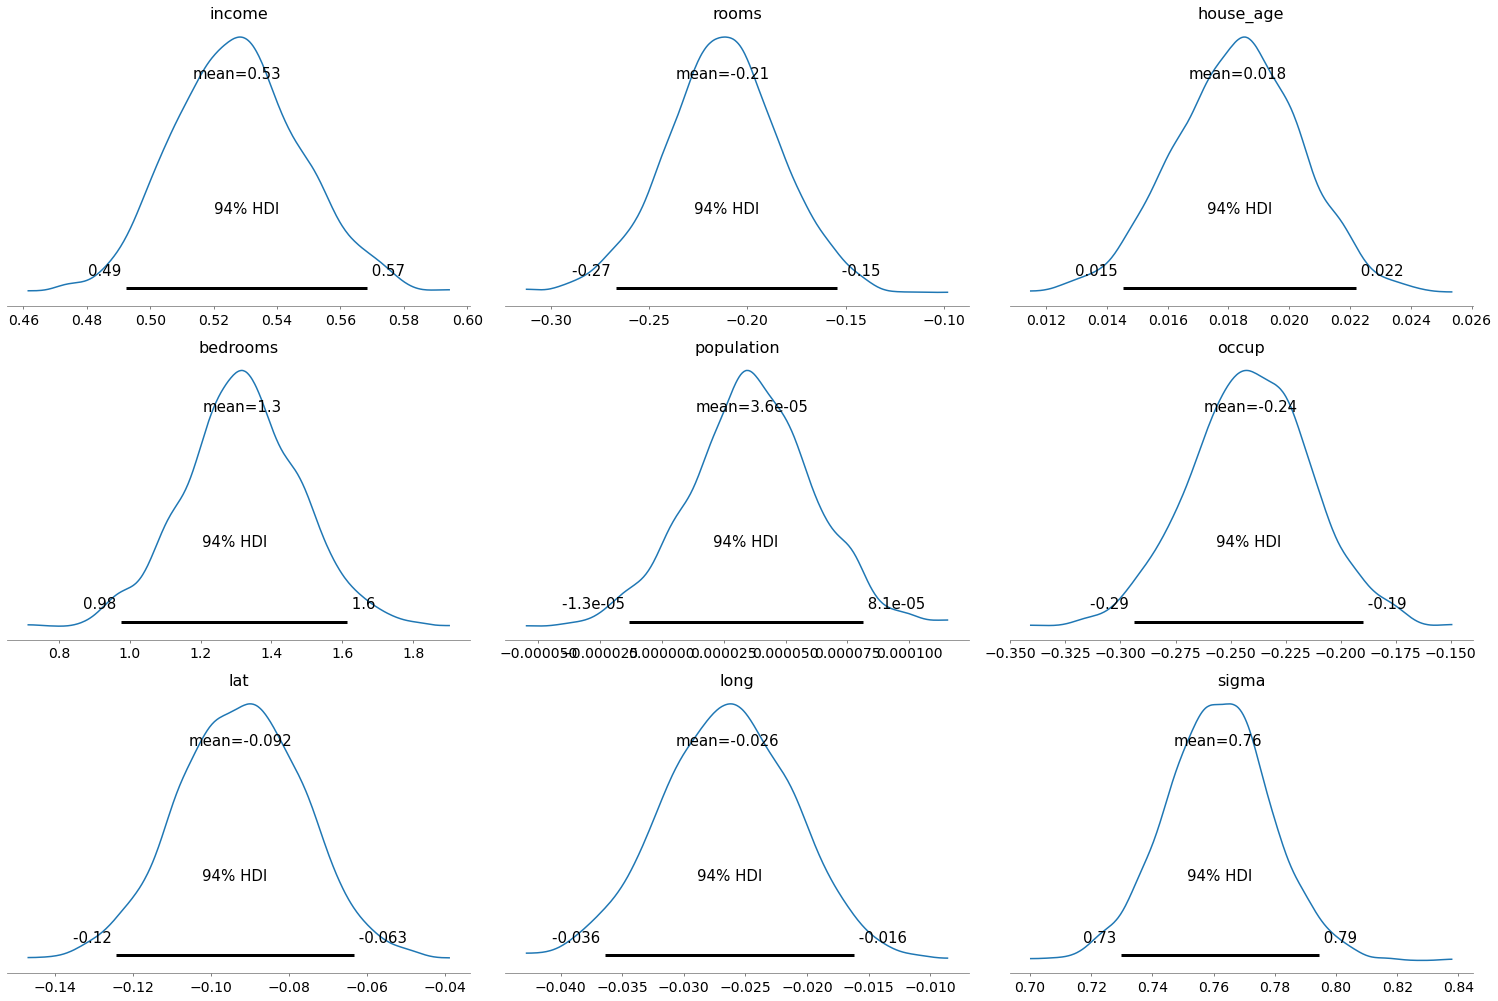

In [32]:
import arviz as az
#all trace plots. They only tell us about the convergence in the markov chain
with model:
    #\pm.traceplot(trace)
    print(az.summary(trace))
    az.plot_posterior(trace)

In [30]:
def plot_ppc(smpl, title):
    posterior_predictive_checks = pm.sample_posterior_predictive(trace, model=model, samples=smpl, progressbar=True)
    y_replicas = [y_rep.mean() for y_rep in posterior_predictive_checks['y']]  


    fig, ax = plt.subplots(1, figsize=(12, 6))
    ax.hist(y_replicas, bins=50, alpha=0.5, color="blue", histtype="stepfilled", label="pred")
    ax.hist(y_train_full[0:smpl], bins=50, alpha=0.5, color="yellow", histtype="stepfilled", label="acc")
    
    ax.axvline(y_train_full[0:smpl].mean(), color="red", label="data")
    ax.axvline(np.array(y_replicas).mean(), color="green", label="pred")
    
    ax.legend(loc=2)
    ax.set_xlabel("mean price", fontsize=10) 
    ax.set_ylabel("number of datapoints", fontsize=10)
    plt.title(title)
    plt.show()

Did your run of PyMC3 succeed, that is: did it produce good approximations to the desired posterior distributions?

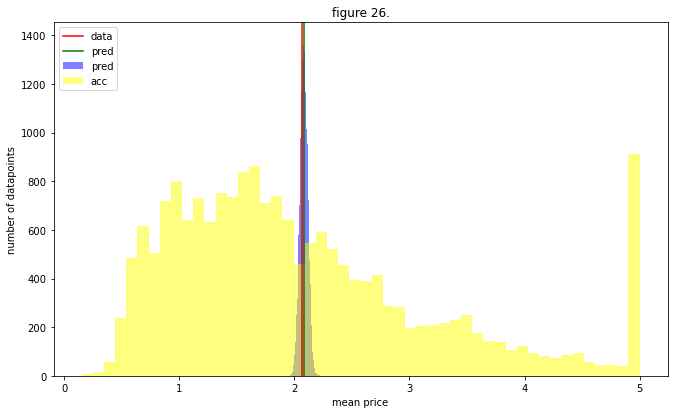

/home/karolina/anaconda3/lib/python3.8/site-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


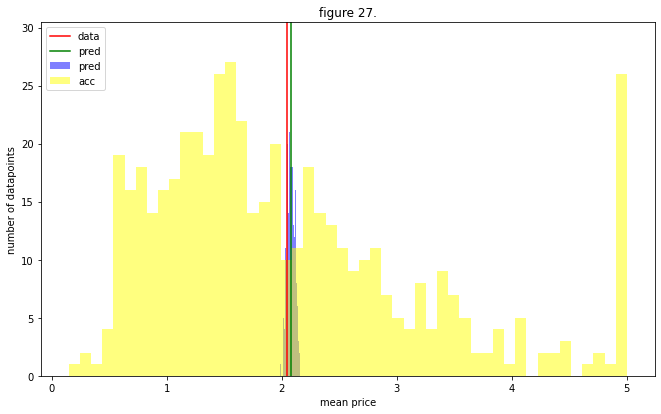

/home/karolina/anaconda3/lib/python3.8/site-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


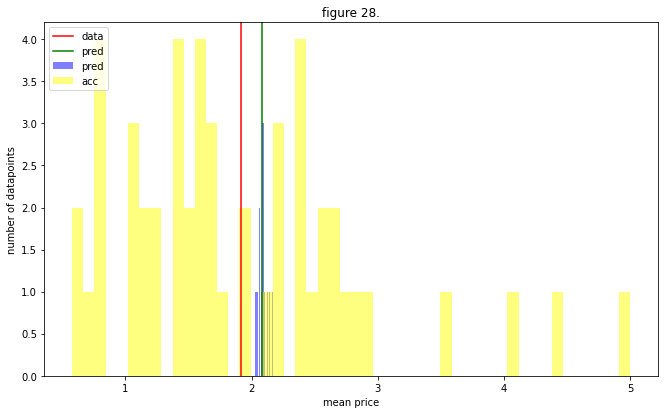

In [31]:
#it can be determined by the predictive check
#it's a very bad prediction
#even the wrong prior distribution choice shouldn't have THAT much of an impact
plot_ppc(20640, 'figure 26.')
plot_ppc(500, 'figure 27.')
plot_ppc(50, 'figure 28.')

In [25]:
#try to plot the posteriors over each parameter
#it could be compared to the priors of the parameters
print(trace['income'])
plt.figure(figsize=(5, 5))
plt.hist(trace['income'], 25, histtype='step')
plt.xlabel('income')
plt.show()

AttributeError: 'InferenceData' object has no attribute 'income'

 The full dataset has 20640 datapoints. Now run PyMC3 on two random samples of datapoints, one of size 50 and one of size 500. Compare the posterior distributions you get for the 3 dataset sizes (50, 500 and 20640), stating what the most important differences are and explaining how these differences arose.

In [ ]:
#the larger the dataset size the closer the real and predictive means: bayes needs large samples

### 2.4 Trees and ensembles
This part extends the work on decision trees and ensemble methods from lab 7 to regression on the California Housing regression task.

### 2.4.1 CART Decision Trees
In this part you are going to apply a decision tree regressor to the California
housing dataset and analyse its behaviour. Your answers should address the
following points:
1. Briefly explain how the CART decision tree method works. (2 marks)
2. Use model selection to optimise the hyperparameters of the model. Which hyperparameter has the strongest effect on the model’s performance? Use a plot to show this effect. (5 marks)
3. How do the hyperparameters affect the training time? Use plots to support your discussion. Explain how this affects your choice of hyperparameter values. (3 marks)
4. What are the results for your chosen setup on the test set? Interpret and discuss your results. (3 marks)
5. Visualise the tree (or part of the tree) and use the visualisation to identify the most important features. (2 marks)

For a given dataset of input-output pairs, there are a number of ways to construct a decision tree that can accurately classify the set of examples. We will be using the implementation of decision trees from the scikit-learn library which uses the CART (Classification And Regression Tree) algorithm with the Gini impurity criterion (see this for simple explanation of Gini impurity). This algorithm can be summarised as follows:

1. Obtaining the root node: Test the possible splits of the dataset using conditions involving each of the input features and measure the Gini impurity of each split. The root node is given by the split that minimises the weighted sum of the Gini impurities of the two branches. The weights are equal to the number of data points that satisfy the condition of the corresponding branch.
2. Creating the remaining decision nodes: Iteratively follow the same process as step 1 using only the data points that match the conditions necessary to reach this point in the tree.
3. Creating the Leaf nodes: These nodes are created when one of the stopping criteria is met. This set of criteria includes the case where all points of each class have been completely separated by a split (i.e. when the impurity is 0) or when some maximum depth has been reached.


In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

import graphviz

Use model selection to optimise the hyperparameters of the model. Which hyperparameter has the strongest effect on the model’s performance? Use a plot to show this effect. 

In [9]:
dataset = X #np.array(california_housing.data)
X_feature_names = california_housing.feature_names
y = np.array(california_housing.target)
#y_target_names = california_housing.target_names

# 60% training, 20% dev and 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.25)
print(X_train.shape); print(X_test.shape)
print(y_train.shape); print(y_test.shape)

(12384, 8)
(4128, 8)
(12384,)
(4128,)


In [51]:
tree_model = DecisionTreeRegressor(random_state = 40)
tree_model.fit(X_train, y_train)

print("Training set accuracy: {}".format(tree_model.score(X_train, y_train)))
print("Test set accuracy: {}".format(tree_model.score(X_test, y_test)))

Training set accuracy: 1.0
Test set accuracy: 0.5960158546655914


In [7]:
from sklearn.metrics import mean_squared_error
prediction = tree_model.predict(X_train)
print(mean_squared_error(y_train, prediction))

7.389200985597333e-32


In [52]:
#Normalized total reduction of criteria by feature (Gini importance).

#min_samples_split - Minimum samples for a node split
#min_samples_leaf - Minimum samples for a terminal node (leaf)
#max_depth - Maximum depth of the tree (vertical depth)
#max_features - Maximum features to consider for a split

#min_weight_fraction_leaffloat, default=0.0
#The minimum weighted fraction of the sum total of weights (of all the input samples) 
#required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

#max_leaf_nodesint, default=None
#Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. 
#If None then unlimited number of leaf nodes.

#min_impurity_decreasefloat, default=0.0
#A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

#ccp_alphanon-negative float, default=0.0
#Complexity parameter used for Minimal Cost-Complexity Pruning. 
#The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. 
#By default, no pruning is performed.

from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 100, 200],
    'min_samples_split': np.arange(1, 50, 5),#[5, 10, 20, 50, 100],
    'min_samples_leaf': np.arange(1, 50, 5),#[5, 10, 20, 50, 100],
    'max_features': [1, 2 , 3, 4, 5, 6, 7, 8],
    #'max_leaf_nodesint': [2, 3, 5, 10, 20, 50, 100, 1000],
    #'min_impurity_decreasefloat': [2, 3, 5, 10, 20, 50, 100, 1000],

}

clf = GridSearchCV(tree_model, param_grid, cv = 5, scoring='r2', verbose = 2, n_jobs=-1)
# perform search
clf.fit(X_train, y_train)

# best estimator
params = clf.best_params_
best_score = clf.best_score_
print(params)
print(best_score)
print (clf.score(X_train,y_train))
print (clf.score(X_test,y_test))


Fitting 5 folds for each of 10400 candidates, totalling 52000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 3276 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 7458 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 9156 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 11346 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 14016 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 17178 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 20820 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 24954 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 29568 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 34674 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 40260 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 46338 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 51993 out of 52000 | elapsed: 12.2min remaining:    0.1s
[Parallel(n_

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 11, 'min_samples_split': 6}
0.7156957851549308
0.8065781091278212
0.7113669963425072


In [10]:
#it's overfitting a lot less now!
#{'max_depth': 500, 'max_features': 3, 'min_samples_leaf': 11, 'min_samples_split': 21}
#tree_model = DecisionTreeRegressor(max_depth = 20, max_features = 4, min_samples_leaf = 10, min_samples_split = 30)
#tree_model = DecisionTreeRegressor(max_depth = 10, max_features = 5, min_samples_leaf = 21, min_samples_split = 46, random_state = 40)
tree_model = DecisionTreeRegressor(max_depth = 10, max_features = 6, min_samples_leaf = 11, min_samples_split = 6, random_state = 40)

tree_model.fit(X_train, y_train)

print("Training set accuracy: {}".format(tree_model.score(X_train, y_train)))
print("Test set accuracy: {}".format(tree_model.score(X_test, y_test)))
print(tree_model.feature_importances_)

Training set accuracy: 0.8080281178299703
Test set accuracy: 0.7252302492421119
[0.61382044 0.05024186 0.00935312 0.00688973 0.00890612 0.14043065
 0.08156033 0.08879775]


In [60]:
#get hyperparameter importances
#plot the relation between the most important one and the model's performance (validation curve?)
from sklearn.model_selection import validation_curve
def plot_validation_curve(model, X, y, param_range, param_name, title):
    train_scores, test_scores = validation_curve(estimator=model,
                                             X=X, y=y,
                                             cv=5,
    param_name=param_name, param_range=param_range)
#
# Find the mean of training and test scores out of 10-fod StratifiedKFold cross validation run as part fo execution of validation curve
#
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
    plt.plot(param_range, train_mean,
             marker='o', markersize=5,
             color='blue', label='Training Accuracy')
    plt.plot(param_range, test_mean,
             marker='o', markersize=5,
             color='green', label='Validation Accuracy')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.grid()
    plt.show()

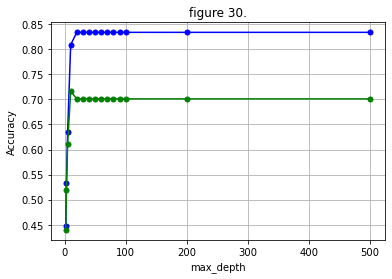

/home/karolina/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/karolina/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/karolina/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/karolina/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/karolina/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py

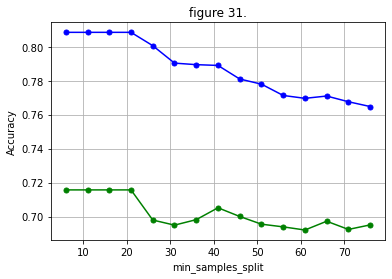

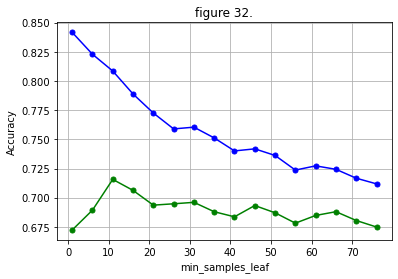

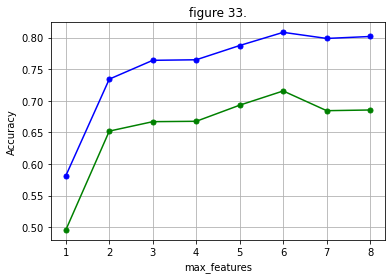

In [61]:
#it appesars max depth has the strongest effect
max_depth_range = [2, 3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 500]
plot_validation_curve(tree_model, X_train, y_train, max_depth_range, 'max_depth', 'figure 30.')
min_samples_split_range = np.arange(1, 80, 5)
plot_validation_curve(tree_model, X_train, y_train, min_samples_split_range, 'min_samples_split', 'figure 31.')
min_samples_leaf_range = np.arange(1, 80, 5)
plot_validation_curve(tree_model, X_train, y_train, min_samples_leaf_range, 'min_samples_leaf', 'figure 32.')
max_features = [1, 2 , 3, 4, 5, 6, 7, 8]
plot_validation_curve(tree_model, X_train, y_train, max_features, 'max_features', 'figure 33.')

How do the hyperparameters affect the training time? Use plots to support your discussion. Explain how this affects your choice of hyperparameter values.

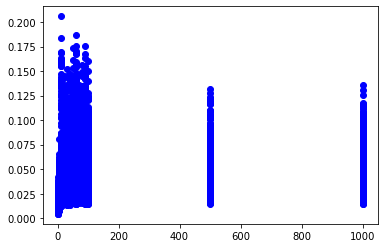

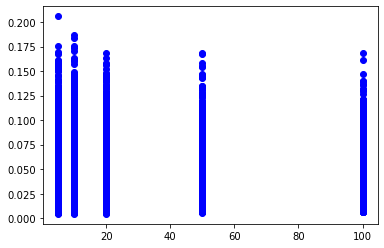

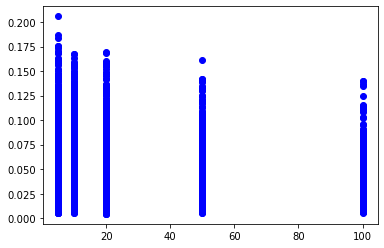

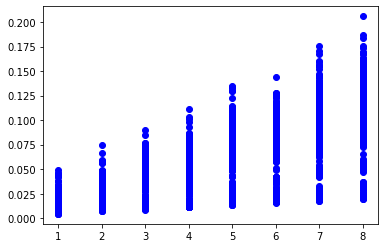

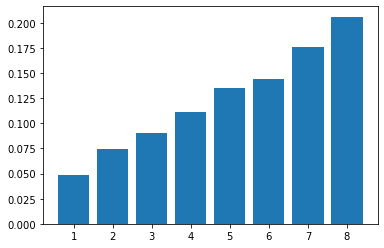

In [140]:
plt.scatter(clf.cv_results_['param_max_depth'].data, clf.cv_results_['mean_fit_time'],
             c='blue')
plt.show()
plt.scatter(clf.cv_results_['param_min_samples_split'].data, clf.cv_results_['mean_fit_time'],
             c='blue')
plt.show()
plt.scatter(clf.cv_results_['param_min_samples_leaf'].data, clf.cv_results_['mean_fit_time'],
             c='blue')
plt.show()
plt.scatter(clf.cv_results_['param_max_features'].data, clf.cv_results_['mean_fit_time'],
             c='blue')
plt.show()

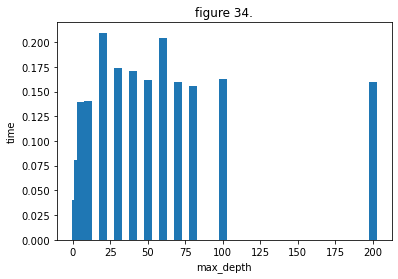

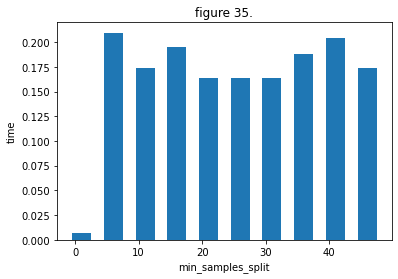

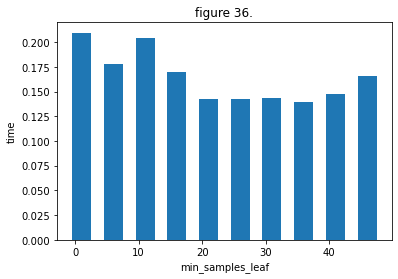

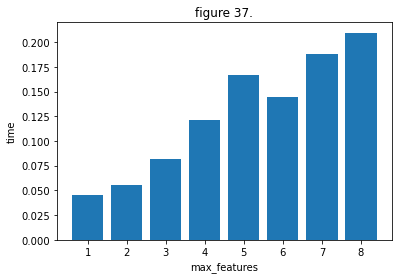

In [65]:
plt.bar(clf.cv_results_['param_max_depth'].data, clf.cv_results_['mean_fit_time'], width = 5)
plt.xlabel('max_depth')
plt.ylabel('time')
plt.title('figure 34.')
plt.show()
plt.bar(clf.cv_results_['param_min_samples_split'].data, clf.cv_results_['mean_fit_time'], width = 3)
plt.xlabel('min_samples_split')
plt.ylabel('time')
plt.title('figure 35.')
plt.show()
plt.bar(clf.cv_results_['param_min_samples_leaf'].data, clf.cv_results_['mean_fit_time'], width = 3)
plt.xlabel('min_samples_leaf')
plt.ylabel('time')
plt.title('figure 36.')
plt.show()
plt.bar(clf.cv_results_['param_max_features'].data, clf.cv_results_['mean_fit_time'])
plt.xlabel('max_features')
plt.ylabel('time')
plt.title('figure 37.')
plt.show()


What are the results for your chosen setup on the test set?

In [66]:
print("Training set accuracy: {}".format(tree_model.score(X_train, y_train)))
print("Test set accuracy: {}".format(tree_model.score(X_test, y_test)))

Training set accuracy: 0.8065781091278212
Test set accuracy: 0.7113669963425072


Visualise the tree (or part of the tree) and use the visualisation to identify the most important features.

[0.60896964 0.0527468  0.01655762 0.0106243  0.00724676 0.12250158
 0.08823217 0.09312113]


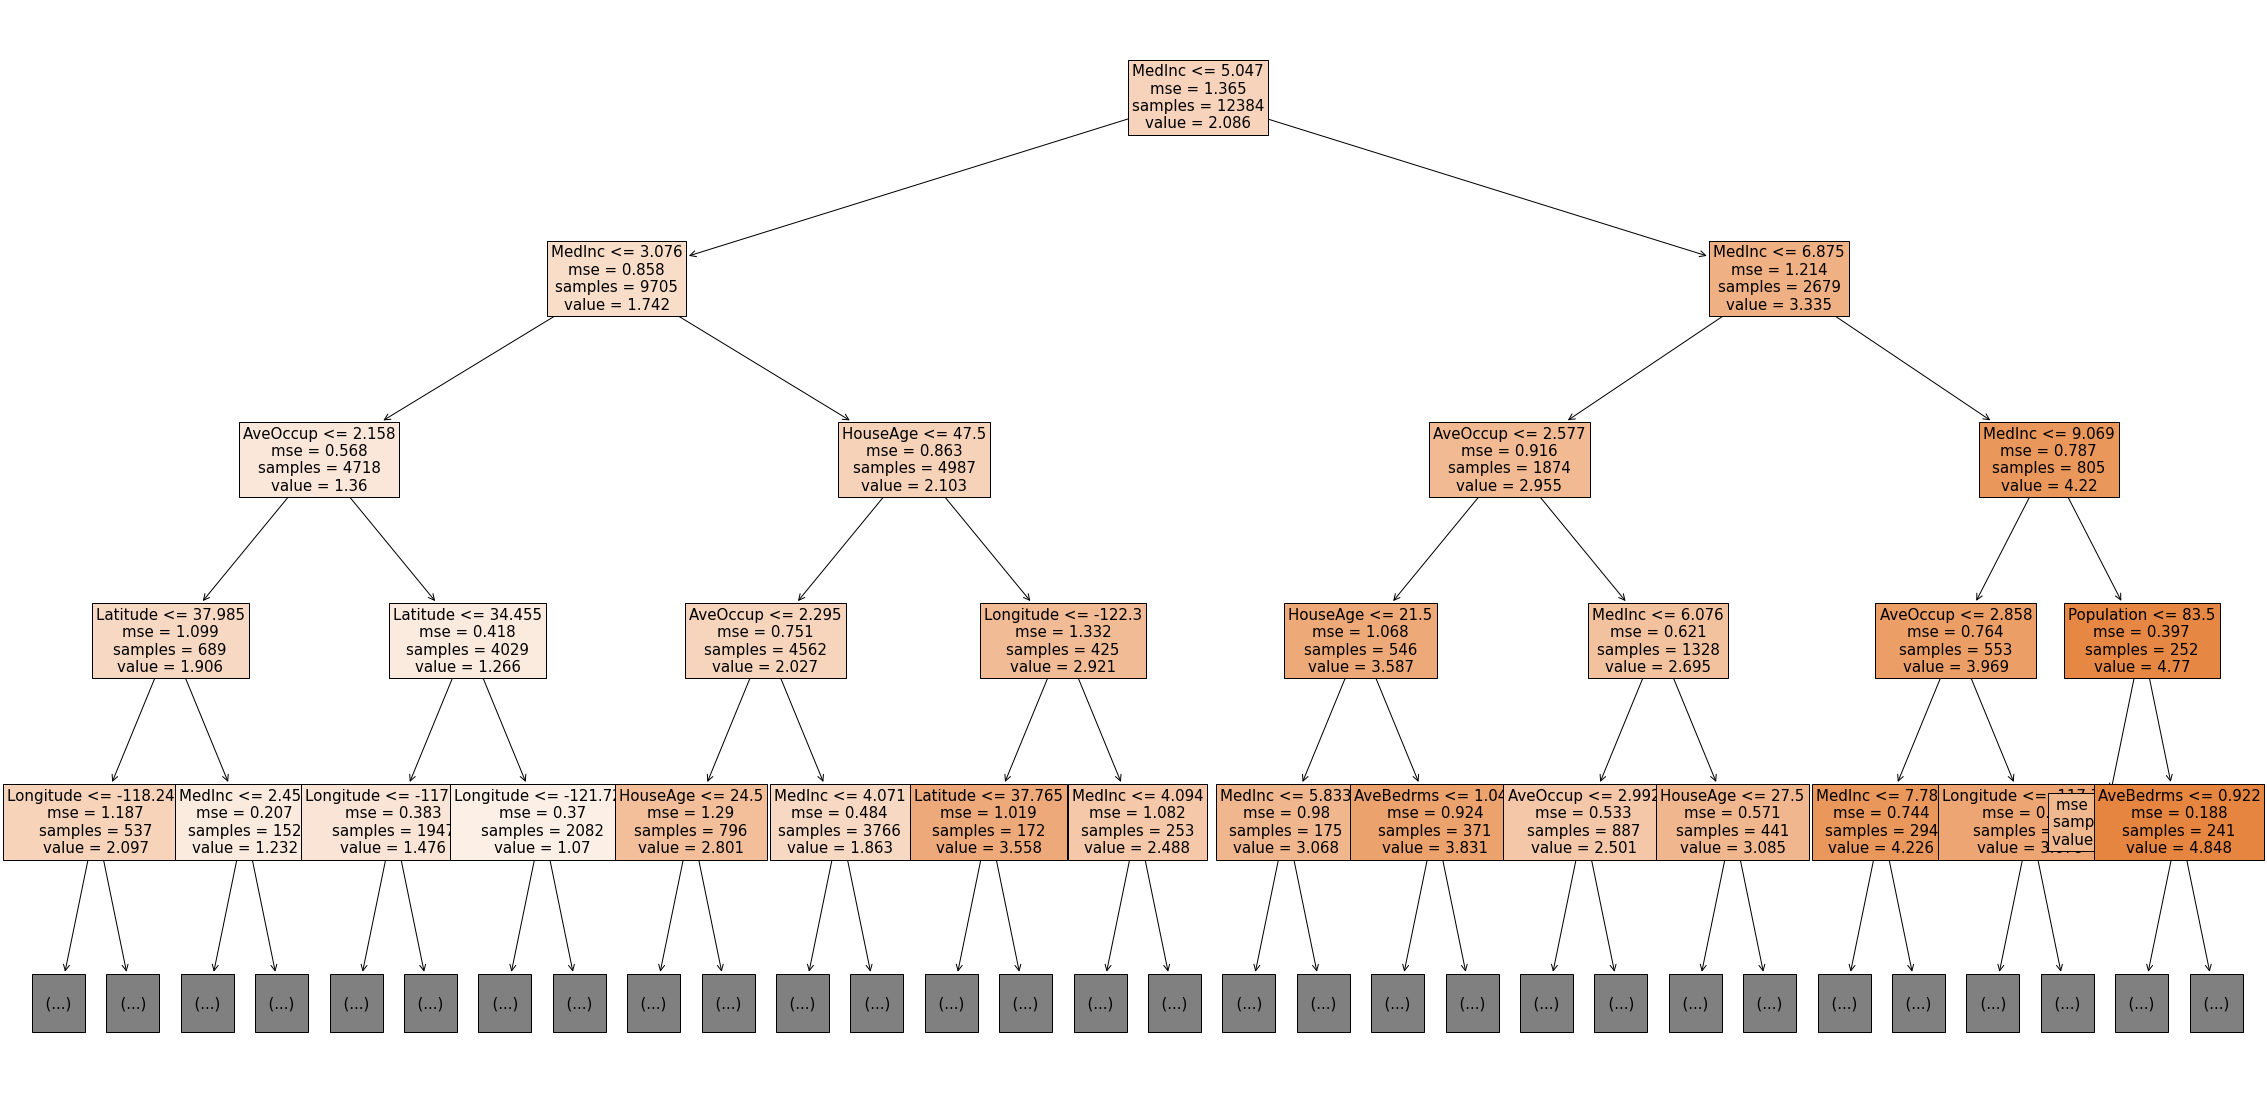

In [77]:
import graphviz
from sklearn import tree

print(tree_model.feature_importances_)

text_representation = tree.export_text(tree_model)

fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(tree_model, feature_names=X_feature_names, filled=True, fontsize = 15, max_depth = 4)
#income is the most important

### 2.4.2 Random Forests
Here, you will apply a random forest regressor to the California housing
dataset and compare its behaviour with other methods. Your answers should
address the following points:
1. Briefly explain how random forests work. (2 marks)
2. Determine a suitable number of base models for your random forest.
Justify your choice. (2 marks)
3. What are the results for your chosen setup on the test set? Interpret
and discuss your results. (3 marks)
4. Compare your results for the random forest with those of the single
decision tree and Bayesian Linear Regression, considering both per-
formance and training time. Use a table or suitable plot to show the
comparison and discuss the reasons for the differences. (3 marks)

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

Determine a suitable number of base models for your random forest. 

In [79]:
regressor = RandomForestRegressor(n_estimators = 800, random_state = 0)
regressor.fit(X_train, y_train)
#validation curve and gridcv?

RandomForestRegressor(n_estimators=800, random_state=0)

In [80]:
print("Training set accuracy: {}".format(regressor.score(X_train, y_train)))
print("Test set accuracy: {}".format(regressor.score(X_test, y_test)))

Training set accuracy: 0.9726582996478703
Test set accuracy: 0.806721104341782


In [ ]:
est_range = [10, 20, 50, 100, 200, 300, 400, 500, 700, 800, 1000, 1200, 1500, 2000, 2500]
plot_validation_curve(regressor, X_train, y_train, est_range, 'n_estimators', 'figure 39.')

In [7]:
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor.fit(X_train, y_train)
print("Training set accuracy: {}".format(regressor.score(X_train, y_train)))
print("Test set accuracy: {}".format(regressor.score(X_test, y_test)))

Training set accuracy: 0.9728848303979101
Test set accuracy: 0.788952478338361


In [78]:
param_grid = {
    'n_estimators': est_range
}


tuned_forest= GridSearchCV(regressor, param_grid, cv = 5, scoring='r2', verbose = 2, n_jobs=-1)
# perform search
tuned_forest.fit(X_train, y_train)

# best estimator
params = tuned_forest.best_params_

print(params)
print(tuned_forest.score(X_train,y_train))
print(tuned_forest.score(X_test,y_test))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.3min finished


{'n_estimators': 200}
0.9609113648579278
0.7450380046571629


What are the results for your chosen setup on the test set? 

In [11]:

regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor.fit(X_train, y_train)
print("Test set accuracy: {}".format(regressor.score(X_test, y_test)))

Test set accuracy: 0.811551875354039


Compare your results for the random forest with those of the single decision tree and Bayesian Linear Regression, considering both performance and training time. Use a table or suitable plot to show the comparison and discuss the reasons for the differences.

In [27]:
from sklearn.metrics import r2_score

posterior_predictive_checks = pm.sample_posterior_predictive(trace, model=model, samples=1000, progressbar=True)
y_reps = [y_rep.mean() for y_rep in posterior_predictive_checks['y']]  
predictions = np.mean(posterior_predictive_checks['y'], axis = 0)

def rsme(preds, targets):
    return np.sqrt(np.mean((preds-targets)**2))

print(y_test.shape)
print(np.array(y_reps).shape)
print(predictions.shape)
print(r2_score(y_train, predictions))
print("Test set accuracy: {}".format(r2_score(y_test_full[0:1000], predictions)))
train_model_score = r2_score(y_train, predictions)
test_model_score = 0-r2_score(y_test_full[0:1000], predictions)

/home/karolina/anaconda3/lib/python3.8/site-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


(200,)
(1000,)
(1000,)
0.5749097920689137
Test set accuracy: -0.5722267627879307


Bayesian linear regression
Training set accuracy: 0.5749097920689137
Test set accuracy: 0.5722267627879307
Decision tree regression
Training set accuracy: 0.7592390067169479
Test set accuracy: 0.8245025676788826
Random forest regression
Training set accuracy: 0.9008364464530138
Test set accuracy: 0.9238186742707686
treeraining time: 0.00390934944152832s
forest training time: 0.9521796703338623s


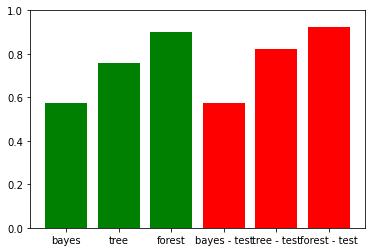

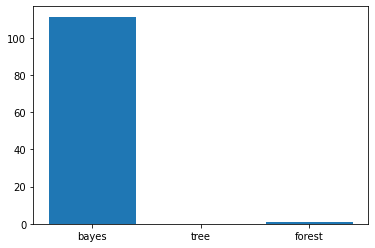

In [28]:
#might be wrong for bayes - very likely
print("Bayesian linear regression")
print("Training set accuracy: {}".format(train_model_score))
print("Test set accuracy: {}".format(test_model_score))
print("Decision tree regression")
print("Training set accuracy: {}".format(tree_model.score(X_train, y_train)))
print("Test set accuracy: {}".format(tree_model.score(X_test, y_test)))
print("Random forest regression")
print("Training set accuracy: {}".format(regressor.score(X_train, y_train)))
print("Test set accuracy: {}".format(regressor.score(X_test, y_test)))
x = np.array(['bayes', 'tree', 'forest'])
y = np.array([train_model_score, tree_model.score(X_train, y_train), regressor.score(X_train, y_train)])
xt = np.array(['bayes - test', 'tree - test', 'forest - test'])
yt = np.array([test_model_score, tree_model.score(X_test, y_test), regressor.score(X_test, y_test)])


import time
start = time.time()
tree_model.fit(X_train, y_train)
stop = time.time()
tree_time = stop-start
print(f"treeraining time: {stop - start}s")

start = time.time()
regressor.fit(X_train, y_train)
stop = time.time()
forest_time = stop-start
print(f"forest training time: {stop - start}s")
#what do I measure for time in bayes?
xcl = np.array(['bayes', 'tree', 'forest'])
ycl = np.array([bayes_time, tree_time, forest_time])


plt.bar(x, y, color = "green")
plt.bar(xt, yt, color = "red")
plt.ylim(0,1)
plt.show()

plt.bar(xcl, ycl)
#plt.ylim(0, 1)
plt.show()